In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Vizualizacija podataka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Line chart

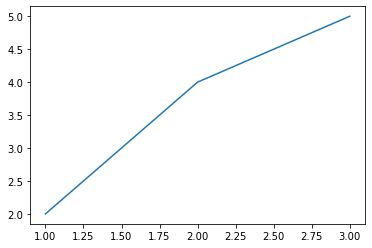

In [4]:
x = [1,2,3]
y = [2,4,5]
plt.plot(x,y)
plt.show()

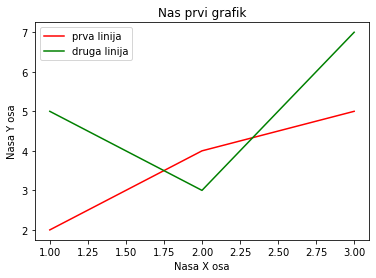

In [17]:
x1 = [1,2,3]
y1 = [2,4,5]
x2 = [1,2,3]
y2 = [5,3,7]
plt.xlabel('Nasa X osa')
plt.ylabel('Nasa Y osa')
plt.title('Nas prvi grafik')
plt.plot(x1,y1,label = 'prva linija',color = 'red')
plt.plot(x2,y2,label = 'druga linija',color = 'green')
plt.legend()
plt.show()

## Bar chart

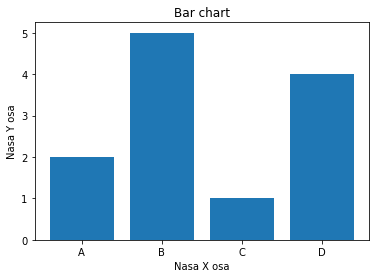

In [11]:
x = ['A','B','C','D']
y = [2,5,1,4]

plt.xlabel('Nasa X osa')
plt.ylabel('Nasa Y osa')
plt.title('Bar chart')
plt.bar(x,y)
plt.show()

## Pie chart

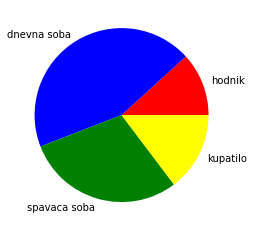

In [14]:
delovi = [4,15,10,5]
colors = ['red','blue','green','yellow']
imena_delova = ['hodnik','dnevna soba','spavaca soba', 'kupatilo']
plt.pie(delovi,labels =imena_delova,colors =colors)
plt.show()

## Scatterplot

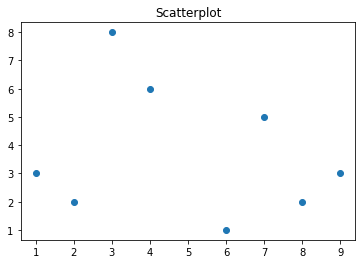

In [18]:
x = [1,2,4,6,3,7,8,9]
y = [3,2,6,1,8,5,2,3]

plt.title('Scatterplot')
plt.scatter(x,y)
plt.show()

## Titanik

In [2]:
titanik = pd.read_csv('titanik_clean.csv')
titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


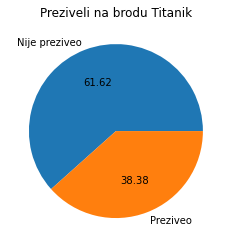

In [11]:
data = titanik['Survived'].value_counts()
plt.pie(data,labels = ['Nije preziveo','Preziveo'], autopct='%.2f')
plt.title('Preziveli na brodu Titanik')
plt.show()

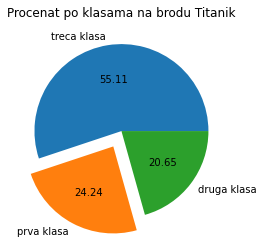

In [17]:
explode = [0,0.2,0]
data = titanik['Pclass'].value_counts()
plt.pie(data,labels = ['treca klasa','prva klasa','druga klasa'], autopct='%.2f',explode = explode)
plt.title('Procenat po klasama na brodu Titanik')
plt.show()

In [20]:
mapping_table = pd.Series({1:'Prva klasa',2:'Druga klasa',3:'Treca klasa'})

In [21]:
titanik['class_str'] = titanik['Pclass'].map(mapping_table)

In [22]:
titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,class_str
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Treca klasa
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Prva klasa
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Treca klasa
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Prva klasa
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Treca klasa


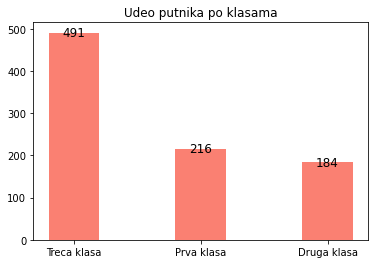

In [46]:
x = titanik['class_str'].value_counts().index
y = titanik['class_str'].value_counts().values
plt.bar(x,y, color= 'salmon',width = 0.4)
plt.title('Udeo putnika po klasama')
for i, val in enumerate(y):
    plt.text(i, val, str(val), fontsize = 12, ha= 'center', va='center')
plt.show()

In [49]:
group = titanik.groupby(['Sex','Survived']).size().unstack()

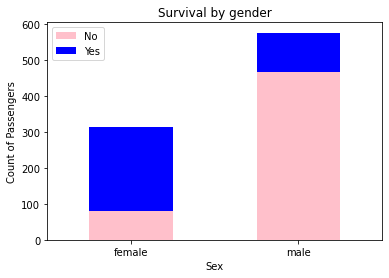

In [54]:
group.plot(kind = 'bar', stacked = True, color = ['pink','blue'])
plt.title('Survival by gender')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(labels = ['No','Yes'])
plt.show()

In [56]:
group = titanik.groupby(['Survived','Sex']).size().unstack()

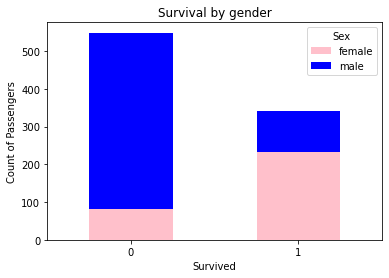

In [58]:
group.plot(kind = 'bar', stacked = True, color = ['pink','blue'])
plt.title('Survival by gender')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
#plt.legend(labels = ['No','Yes'])
plt.show()

In [59]:
male = titanik[titanik['Sex']=='male']
female = titanik[titanik['Sex']=='female']

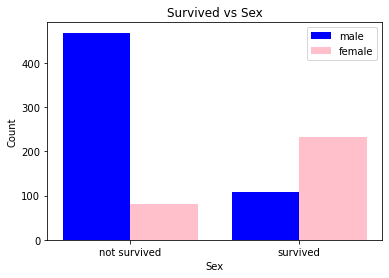

In [72]:
X = ['not survived','survived']
x1 = male['Survived'].value_counts().index
y1 = male['Survived'].value_counts().values

x2 = female['Survived'].value_counts().index
y2 = female['Survived'].value_counts().values
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survived vs Sex')
plt.xticks(x1, X)
plt.bar(x1-0.2,y1, width = 0.4, color = 'blue', label = 'male')
plt.bar(x2+0.2,y2, width = 0.4, color = 'pink', label = 'female')
plt.legend()
plt.show()

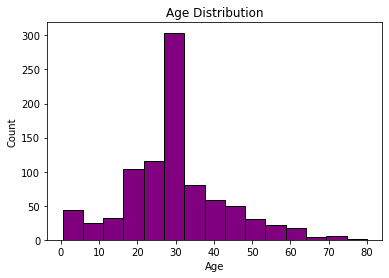

In [77]:
x =titanik['Age']
plt.hist(x,bins=15, color = 'purple', edgecolor = 'black') 


plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

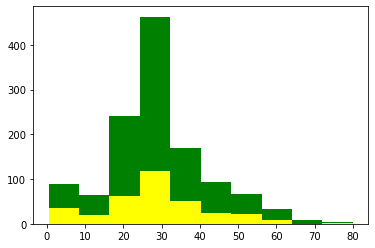

In [100]:
data =[titanik[titanik['Survived']==1]['Age'],titanik['Age']]
plt.hist(x=data, stacked = True, color = ['yellow', 'green'])
plt.savefig('fig2.png',dpi=300)
plt.show()

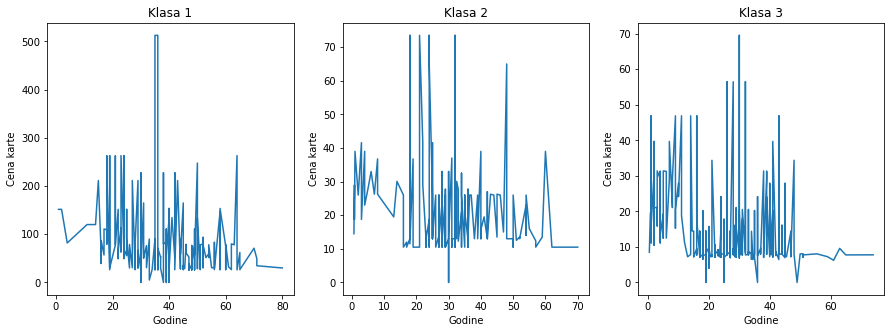

In [99]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
classes = [1,2,3]

for i, pclass in enumerate(classes):
    class_data = titanik[titanik['Pclass'] == pclass]
    class_data = class_data.sort_values(by='Age')
    axs[i].plot(class_data['Age'],class_data['Fare'])
    axs[i].set_title(f'Klasa {pclass}')
    axs[i].set_xlabel('Godine')
    axs[i].set_ylabel('Cena karte')
#axs[0].set_ylabel('Cena karte')   
fig.savefig('figure.png', dpi = 300)
plt.show()    

In [94]:
bins = []
labels = []
for i in range(0,90,10):
    bins.append(i)
    if i!=80:
        labels.append(f'{i} - {i+10}')


In [92]:
bins

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [95]:
labels

['0 - 10',
 '10 - 20',
 '20 - 30',
 '30 - 40',
 '40 - 50',
 '50 - 60',
 '60 - 70',
 '70 - 80']

In [97]:
titanik['age_bin'] = pd.cut(titanik['Age'], bins = bins , labels = labels)

In [98]:
titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,class_str,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Treca klasa,20 - 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Prva klasa,30 - 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Treca klasa,20 - 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Prva klasa,30 - 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Treca klasa,30 - 40


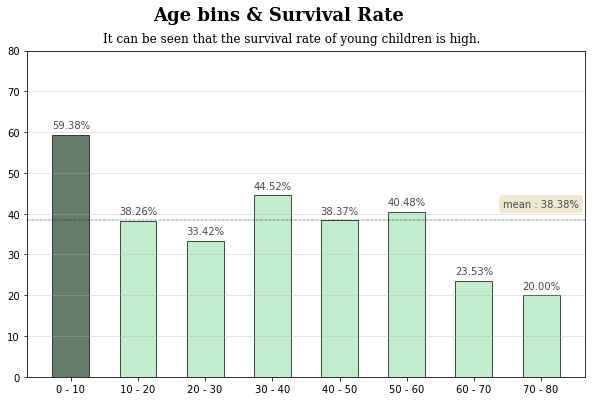

In [113]:
titanic_age = titanik[['age_bin', 'Survived']].groupby('age_bin')['Survived'].mean()*100
titanic_age = titanic_age.reset_index()
titanic_age = titanic_age.set_index('age_bin')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
color_map = []
for i in titanic_age['Survived'].values:
    if i <50:
        color_map.append('#c0edcc')
    else:
        color_map.append('#647d6b')


ax.bar(titanic_age['Survived'].index, titanic_age['Survived'],        
       color=color_map,
       width=0.55, 
       edgecolor='black', 
       linewidth=0.7)


for i in titanic_age['Survived'].index:
    ax.annotate(f"{titanic_age['Survived'][i]:.02f}%", 
                   xy=(i, titanic_age['Survived'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')



mean = titanik['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='-.')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 - 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

 
fig.text(0.3, 0.95, 'Age bins & Survival Rate', fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(0.23, 0.9, 'It can be seen that the survival rate of young children is high.', fontsize=12, fontweight='light', fontfamily='serif')


ax.grid(axis='y', linestyle='-', alpha=0.4)
#fig.savefig('example_figure.png', dpi=300, bbox_inches='tight')
plt.ylim(0, 80)

plt.show()